### ПЕРЕД ЗАПУСКОМ ПОМЕНЯТЬ ДАТЫ В СОХРАНЯЕМОМ ФАЙЛЕ

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
date = '210924'                                            # Задаем дату в имени файла
dollar_rate = 390                                          # Задаем курс доллара к драмму

In [1]:
df = pd.read_csv(rf'D:\Ela\flats_Yerevan\flats_yerevan{date}.csv', sep=";") # Загружаем файл
#df.drop(columns=['Unnamed: 0'], inplace=True)                 # удаляем лишнюю колонку с индексом
df.head(1)

NameError: name 'pd' is not defined

##### Предварительно отстраивам данные для визуального просмотра
В результате видно, что часть точек выбивается из общего массива данных

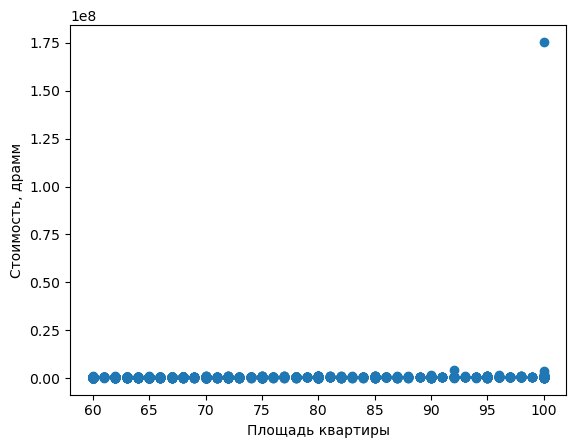

In [5]:
plt.scatter(df['square'], df['cost']) # предварительно просматриваем данные
plt.xlabel('Площадь квартиры') #Подпись для оси х
plt.ylabel('Стоимость, драмм') #Подпись для оси y


plt.show()

In [7]:
df[df['cost'] > 4100000 ].head(5) # Смотрим на выбившиеся значения. Цена указанна в долларах, должна быть в драммах.

,number,region,cost,value,rooms,square,information,link
2089,18655983,Арабкир,175500000,֏,4,100,"$450,000 в месяц, Арабкир, 4 ком., 100 кв.м., ...",https://www.list.am/ru/item/18655983


In [8]:
# df.loc[2303, 'cost'] = 450000 # При ошибке во вводе цены, можно вручную скоректировать параметр

In [10]:
s = df.index [df['cost'] > 4100000 ]. tolist () # Поиск строк с выбившимся значением
s

[2089]

In [11]:
df.loc[(df['cost'] > 3900000), 'cost'] = df['cost']/dollar_rate #Перевод цен в драммы

In [12]:
df.loc[s].head(3) #Проверяем значения

,number,region,cost,value,rooms,square,information,link
2089,18655983,Арабкир,450000.0,֏,4,100,"$450,000 в месяц, Арабкир, 4 ком., 100 кв.м., ...",https://www.list.am/ru/item/18655983


##### Повторно просматриваем данные

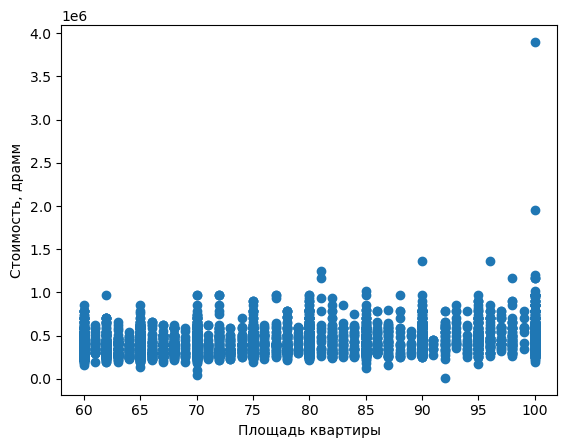

In [13]:
plt.scatter(df['square'], df['cost'])
plt.xlabel('Площадь квартиры') #Подпись для оси х
plt.ylabel('Стоимость, драмм') #Подпись для оси y


plt.show()

In [14]:
df.to_csv(rf'D:\Ela\flats_Yerevan\flats_yerevan_{date}_red.csv', index=False, sep=';', encoding='utf8') # Сохраняем отредактировынные данные